# Módulo 11: Introducción a las redes neuronales
# Tema 1: Neuronas artificiales
## Regresión lineal y logística

El objetivo de esta libreta es estudiar los modelos de regresión lineal y regresión logística. En esta libreta aprenderemos:

1.   Construir un modelo regresión lineal supervisado usando datos de calificaciones.
2. Construir un modelo de regresión  logística usando datos antropométricos de mujeres y hombres.
3. Entrenar un modelo de regresión lineal usando gradiente descendente.


En esta libreta se usará el conjunto de datos de [SAT and GPA data](https://www.openintro.org/data/index.php?data=satgpa)


In [2]:
#!pip install pandas
!pip install statsmodels

In [1]:
#Carga de bibliotecas
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Ejercicio 1: Regresión lineal

### Paso 1: carga de datos

In [5]:
path = "Datos_calificaciones.csv"
data = pd.read_csv(path)
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Text(0, 0.5, 'GPA')

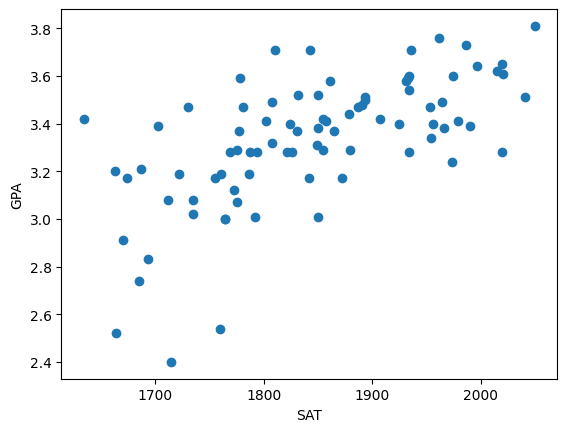

In [6]:
#Generamos los conjuntos de X y
x = data ['SAT']
y = data ['GPA']

#Graficamos los datos
plt.scatter(x,y)
plt.xlabel('SAT')
plt.ylabel('GPA')

### Paso 2: Construir un modelo de regresión lineal usando Statsmodels

[StatsModels:](https://www.statsmodels.org/stable/index.html) es un modulo que provee clases y funciones para:

*   Explorar estadísticas en los datos
*   Estimar modelos estadísticos


In [ ]:
x_datos = sm.add_constant(x)
modelo_stat = sm.OLS(y,x).fit()
modelo_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Mon, 03 Jun 2024   Prob (F-statistic):                   9.38e-102
Time:                        22:06:33   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.24e-05    145.594      0.000       0.002       0.002
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.422
Skew:                          -0.594   Prob(JB):                      0.00331
Kurtosis:                       4.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'GPA')

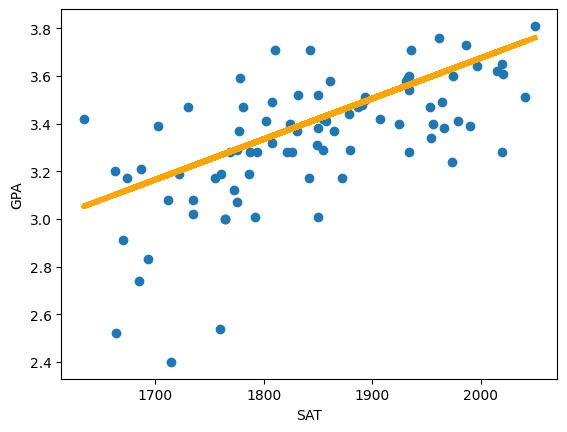

In [ ]:
#Graficando los datos
plt.scatter(x,y)
yhat = 0.0017*x + 0.275
fig = plt.plot(x,yhat, lw=4, c='orange', label ='Regresión lineal')

plt.xlabel('SAT')
plt.ylabel('GPA')

#En el ejercicio 1, crea un nuevo perceptrón que se ajuste a los datos que se muestran en la gráfica 2.

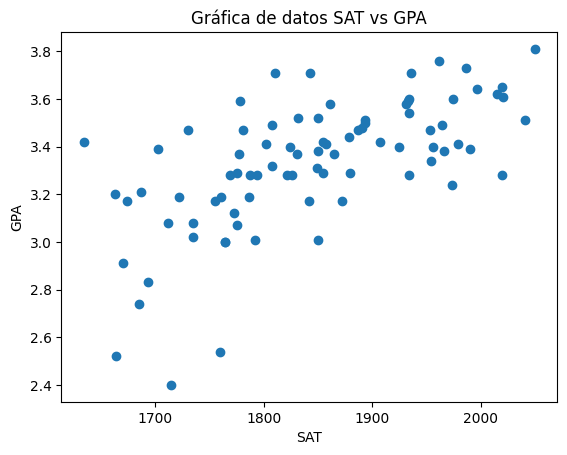

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
path = "Datos_calificaciones.csv"
data = pd.read_csv(path, on_bad_lines='skip')

# Visualizar los datos
plt.scatter(data['SAT'], data['GPA'])
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Gráfica de datos SAT vs GPA')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Preparar los datos
X = data[['SAT']]
y = data['GPA']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un pipeline que estandariza los datos y luego entrena el modelo de regresión lineal
model = make_pipeline(StandardScaler(), LinearRegression())

# Entrenar el modelo
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Mean Squared Error: 0.05248610269753724
R^2 Score: 0.46949246374602116


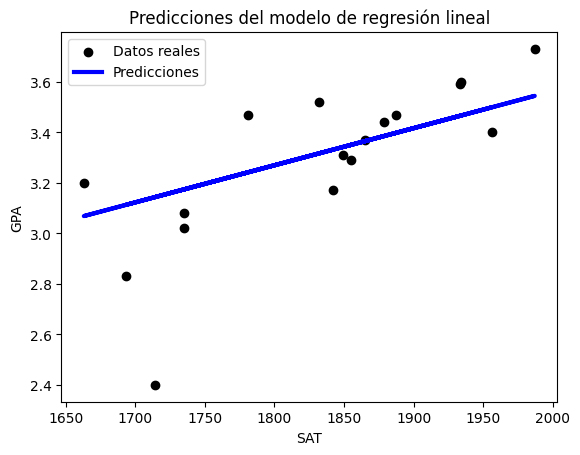

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicciones')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Predicciones del modelo de regresión lineal')
plt.legend()
plt.show()


## Ejercicio 2: regresión logística

### Paso 1: carga de datos

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/2024_DiplomadoIA/Data/Datos_antropometricos.csv"
data = pd.read_csv(path)
data.describe()

,Gender,Height,Weight
count,10000.000000,10000.000000,10000.000000
mean,0.500000,66.367560,161.440357
std,0.500025,3.847528,32.108439
min,0.000000,54.263133,64.700127
25%,0.000000,63.505620,135.818051
50%,0.500000,66.318070,161.212928
75%,1.000000,69.174262,187.169525
max,1.000000,78.998742,269.989698


Text(0, 0.5, 'Weight (lbs)')

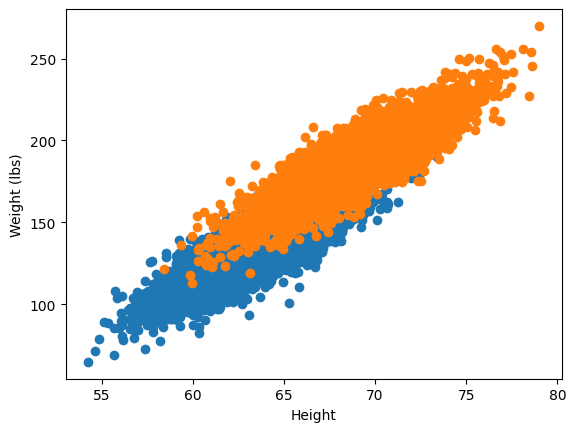

In [ ]:
#Generamos los conjuntos de X y
x = data [['Height', 'Weight']]
y = data ['Gender']

#Graficamos los datos
women = x[(data.Gender==1)]
men = x[(data.Gender==0)]

plt.scatter(women.Height,women.Weight)
plt.scatter(men.Height,men.Weight)
plt.xlabel('Height')
plt.ylabel('Weight (lbs)')

### Paso 2: Construir un modelo de regresión logística con Sklearn

In [ ]:
clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg') #instanciando el modelo
modelo = clf.fit(x, y) #entrenamiento

print("Theta_0: ", modelo.intercept_ )
print("For theta_1 and theta_2: ", modelo.coef_ )

Theta_0:  [-0.69254177]
For theta_1 and theta_2:  [[ 0.49261999 -0.19834042]]


In [ ]:
# Predecir el sexo de una persona de acuerdo a su peso y estatura
y_pred = modelo.predict([(80,170)])
print("Clase predicha: ", y_pred)

Clase predicha:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


En el ejercicio 2, entrena un nuevo modelo de predicción, cambiando la variable de salida (ahora y = gender), puedes usar peso o altura, o crea nuevas variables.Recuerda, que dependiendo de la etiqueta será el modelo que debes entrenar (regresión lineal o logística). También visualiza la matriz de confusión (apóyate de la libreta Perceptrón)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Cargar los datos
path = "Datos_calificaciones.csv"
data = pd.read_csv(path, on_bad_lines='skip')

# Crear una nueva variable de salida basada en GPA
median_gpa = data['GPA'].median()
data['GPA_category'] = (data['GPA'] >= median_gpa).astype(int)

# Usar SAT como característica y GPA_category como etiqueta
X = data[['SAT']]
y = data['GPA_category']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

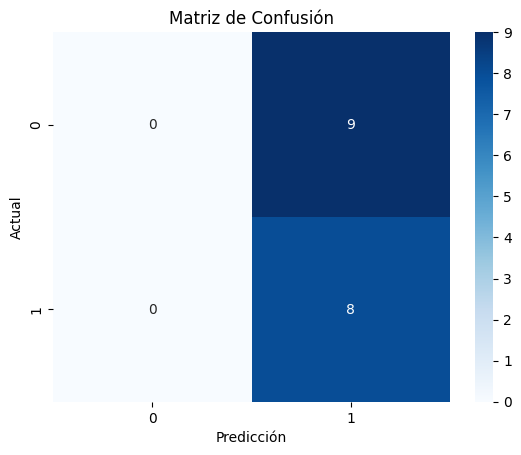

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.47      1.00      0.64         8

    accuracy                           0.47        17
   macro avg       0.24      0.50      0.32        17
weighted avg       0.22      0.47      0.30        17

Precisión del modelo: 0.47


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
